# Análisis Exploratorio de datos

In [ ]:
# 1. Cargue y análisis preliminar de datos

In [ ]:
# Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ruta del archivo
ruta_datos = "C:/AST_Misisipi/EDA/Datos_crudos_Mississippi.csv"

# Cargar los datos
df = pd.read_csv(ruta_datos)

# Verificar el número de observaciones y variables
print(f"Dimensiones del conjunto de datos: {df.shape}")  

# Ver los primeros registros
print("Primeros 5 registros:")
print(df.head())

# Ver los últimos registros
print("Últimos 5 registros:")
print(df.tail())


Dimensiones del conjunto de datos: (366084, 6)
Primeros 5 registros:
     Column1   Column2           Column3 Column4      Column5         Column6
0  agency_cd   site_no          datetime   tz_cd  77624_00060  77624_00060_cd
1         5s       15s               20d      6s          14n             10s
2       USGS  07022000  1995-02-03 14:00     CST       212000          A:[91]
3       USGS  07022000  1995-02-03 14:21     CST       211000          A:[91]
4       USGS  07022000  1995-02-03 15:00     CST       211000          A:[91]
Últimos 5 registros:
       Column1  Column2           Column3 Column4 Column5 Column6
366079    USGS  7022000  2025-01-26 11:00     CST   87800       P
366080    USGS  7022000  2025-01-26 11:30     CST   88000       P
366081    USGS  7022000  2025-01-26 12:00     CST   88100       P
366082    USGS  7022000  2025-01-26 12:30     CST   88200       P
366083    USGS  7022000  2025-01-26 13:00     CST   88100       P


C:\Users\Yuliceth Ramos\AppData\Local\Temp\ipykernel_28656\3382092221.py:11: DtypeWarning: Columns (1,4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(ruta_datos)


In [ ]:
import pandas as pd

# Ruta del archivo
ruta_datos = "C:/AST_Misisipi/EDA/Datos_crudos_Mississippi.csv"

# Cargar los datos ignorando las primeras 3 filas
df = pd.read_csv(ruta_datos, skiprows=2)

# Mostrar las primeras filas para verificar
df.head()


,5s,15s,20d,6s,14n,10s
0,USGS,7022000,1995-02-03 14:00,CST,212000.0,A:[91]
1,USGS,7022000,1995-02-03 14:21,CST,211000.0,A:[91]
2,USGS,7022000,1995-02-03 15:00,CST,211000.0,A:[91]
3,USGS,7022000,1995-02-03 15:21,CST,211000.0,A:[91]
4,USGS,7022000,1995-02-03 16:00,CST,211000.0,A:[91]


In [ ]:
import pandas as pd

# Ruta del archivo
ruta_datos = "C:/AST_Misisipi/EDA/Datos_crudos_Mississippi.csv"

# Cargar los datos ignorando solo las primeras 2 filas
df = pd.read_csv(ruta_datos, skiprows=2)

# Seleccionar solo las columnas 3 y 5 y renombrarlas
df = df.iloc[:, [2, 4]]  # Python cuenta desde 0, por eso usamos 2 y 4
df.columns = ["datetime", "height"]

# Mostrar las primeras filas para verificar
df.head()


,datetime,height
0,1995-02-03 14:00,212000.0
1,1995-02-03 14:21,211000.0
2,1995-02-03 15:00,211000.0
3,1995-02-03 15:21,211000.0
4,1995-02-03 16:00,211000.0


In [ ]:
# Estadísticas Descriptivas
import pandas as pd

# Cargar los datos
ruta_datos = "C:/AST_Misisipi/EDA/Datos_crudos_Mississippi.csv"  # Verificar que la ruta sea correcta
df = pd.read_csv(ruta_datos, skiprows=2)  # Saltar las primeras 2 filas si es necesario

# Seleccionar solo las columnas relevantes y renombrarlas
df = df.iloc[:, [2, 4]]  # Python cuenta desde 0, por eso seleccionamos la columna 3 y 5
df.columns = ["datetime", "height"]

# Convertir la columna datetime a formato de fecha
df["datetime"] = pd.to_datetime(df["datetime"])
df.set_index("datetime", inplace=True)  # Establecer datetime como índice

# Estadísticas descriptivas de la columna "height"
statistics = df["height"].describe()

# Mostrar los resultados
print("Estadísticas Descriptivas:")
print(statistics)

# Calcular percentiles específicos
percentiles = df["height"].quantile([0.25, 0.5, 0.75])  # Percentiles 25%, 50% y 75%
print(f"\nPercentiles 25%, 50% y 75%: \n{percentiles}")


Estadísticas Descriptivas:
count    3.660820e+05
mean     2.538147e+05
std      1.564165e+05
min      0.000000e+00
25%      1.290000e+05
50%      2.080000e+05
75%      3.390000e+05
max      1.050000e+06
Name: height, dtype: float64

Percentiles 25%, 50% y 75%: 
0.25    129000.0
0.50    208000.0
0.75    339000.0
Name: height, dtype: float64


In [ ]:
#Guardar el nuevo archivo con datos limpios
import pandas as pd

# Ruta del archivo original
ruta_datos = "C:/AST_Misisipi/EDA/Datos_crudos_Mississippi.csv"

# Cargar los datos ignorando solo las primeras 2 filas
df = pd.read_csv(ruta_datos, skiprows=2)

# Seleccionar solo las columnas 3 y 5 y renombrarlas
df = df.iloc[:, [2, 4]]  # Python cuenta desde 0, por eso usamos 2 y 4
df.columns = ["datetime", "height"]

# Guardar el nuevo archivo limpio
ruta_nueva = "C:/AST_Misisipi/EDA/Datos_Limpios_Mississippi.csv"
df.to_csv(ruta_nueva, index=False)

print(f"Nuevo archivo guardado en: {ruta_nueva}")


Nuevo archivo guardado en: C:/AST_Misisipi/EDA/Datos_Limpios_Mississippi.csv


In [ ]:
# VErificar si la frecuencia de la serie es regular o irregular
import pandas as pd

# Ruta del archivo limpio
ruta_nueva = "C:/AST_Misisipi/EDA/Datos_Limpios_Mississippi.csv"

# Cargar los datos limpios
df = pd.read_csv(ruta_nueva, parse_dates=['datetime'])

# Ordenar los datos por fecha
df = df.sort_values(by="datetime")

# Tomar los primeros 10 registros
df_subset = df.head(10)

# Calcular las diferencias de tiempo entre observaciones consecutivas
df_subset['time_diff'] = df_subset['datetime'].diff()

# Mostrar las diferencias de tiempo
print("Diferencias de tiempo entre registros consecutivos:")
print(df_subset[['datetime', 'time_diff']])

# Verificar si todas las diferencias son iguales
es_regular = df_subset['time_diff'].iloc[1:].nunique() == 1  # Ignoramos la primera fila (NaT)

# Mostrar el resultado final
if es_regular:
    print("\n✅ La frecuencia de la serie es REGULAR.")
else:
    print("\n⚠️ La frecuencia de la serie es IRREGULAR.")


Diferencias de tiempo entre registros consecutivos:
             datetime       time_diff
0 1995-02-03 14:00:00             NaT
1 1995-02-03 14:21:00 0 days 00:21:00
2 1995-02-03 15:00:00 0 days 00:39:00
3 1995-02-03 15:21:00 0 days 00:21:00
4 1995-02-03 16:00:00 0 days 00:39:00
5 1995-02-03 16:21:00 0 days 00:21:00
6 1995-02-03 17:00:00 0 days 00:39:00
7 1995-02-03 17:21:00 0 days 00:21:00
8 1995-02-03 18:00:00 0 days 00:39:00
9 1995-02-03 18:21:00 0 days 00:21:00

⚠️ La frecuencia de la serie es IRREGULAR.


C:\Users\Yuliceth Ramos\AppData\Local\Temp\ipykernel_28656\3105416218.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['time_diff'] = df_subset['datetime'].diff()


In [ ]:
# Ajustar la frecuencia de los datos a 30 minutos 
import pandas as pd

# Ruta del archivo limpio
ruta_nueva = "C:/AST_Misisipi/EDA/Datos_Limpios_Mississippi.csv"

# Cargar los datos limpios
df = pd.read_csv(ruta_nueva, parse_dates=['datetime'])

# Renombrar columna para asegurarnos de que "datetime" existe correctamente
df.rename(columns=lambda x: x.strip(), inplace=True)  # Eliminar espacios ocultos en los nombres de columnas
df.rename(columns={'DateTime': 'datetime'}, inplace=True)  

# Ajustar la frecuencia a 30 minutos
df_resampled = df.set_index('datetime').resample('30min').mean()

# Mostrar las primeras filas después del resampleo
print("Primeras filas después del resampleo:")
print(df_resampled.head(10))





Primeras filas después del resampleo:
                       height
datetime                     
1995-02-03 14:00:00  211500.0
1995-02-03 14:30:00       NaN
1995-02-03 15:00:00  211000.0
1995-02-03 15:30:00       NaN
1995-02-03 16:00:00  211500.0
1995-02-03 16:30:00       NaN
1995-02-03 17:00:00  212000.0
1995-02-03 17:30:00       NaN
1995-02-03 18:00:00  212000.0
1995-02-03 18:30:00       NaN


In [ ]:
# Número de filas en el DataFrame original
num_filas_original = df.shape[0]

# Número de filas en el DataFrame después del resampleo
num_filas_resampleado = df_resampled.shape[0]

# Mostrar los resultados
print(f"🔹 Número de filas en el DataFrame original: {num_filas_original}")
print(f"🔹 Número de filas en el DataFrame después del resampleo: {num_filas_resampleado}")


🔹 Número de filas en el DataFrame original: 366082
🔹 Número de filas en el DataFrame después del resampleo: 525599


In [ ]:
# Calcular el porcentaje de valores NaN en cada columna
porcentaje_nan_columnas = df_resampled.isnull().mean() * 100

# Mostrar los resultados
print("Porcentaje de valores NaN por columna:")
print(porcentaje_nan_columnas)

# Mostrar solo el porcentaje en la columna 'height'
if 'height' in df_resampled.columns:
    print(f"\nPorcentaje de valores NaN en la columna 'height': {porcentaje_nan_columnas['height']:.2f}%")
else:
    print("\nLa columna 'height' no se encuentra en el DataFrame.")




Porcentaje de valores NaN por columna:
height    30.661588
dtype: float64

Porcentaje de valores NaN en la columna 'height': 30.66%


In [ ]:
# Imputar usando medias móviles con una ventana de 5 periodos (ajustable)
df_resampled['height_imputed'] = df_resampled['height'].fillna(df_resampled['height'].rolling(window=5, min_periods=1).mean())

# Verificar que los datos faltantes han sido imputados
print(df_resampled.isnull().sum())  # Debería dar 0 si la imputación fue exitosa


height            161157
height_imputed     18394
dtype: int64


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Entrenar el modelo ARIMA para imputar los valores faltantes
model = ARIMA(df_resampled['height'], order=(1, 1, 1))  # Se puede con diferentes valores de p, d, q
model_fit = model.fit()

# Imputar los valores faltantes con el modelo ARIMA
df_resampled['height_imputed_arima'] = df_resampled['height'].fillna(model_fit.predict(start=0, end=len(df_resampled)-1))

# Verificar que los datos faltantes han sido imputados
print(df_resampled.isnull().sum())  # Debería dar 0 si la imputación fue exitosa


height                  161157
height_imputed           18394
height_imputed_arima         0
dtype: int64


In [ ]:
# 2. Visualización de la Serie

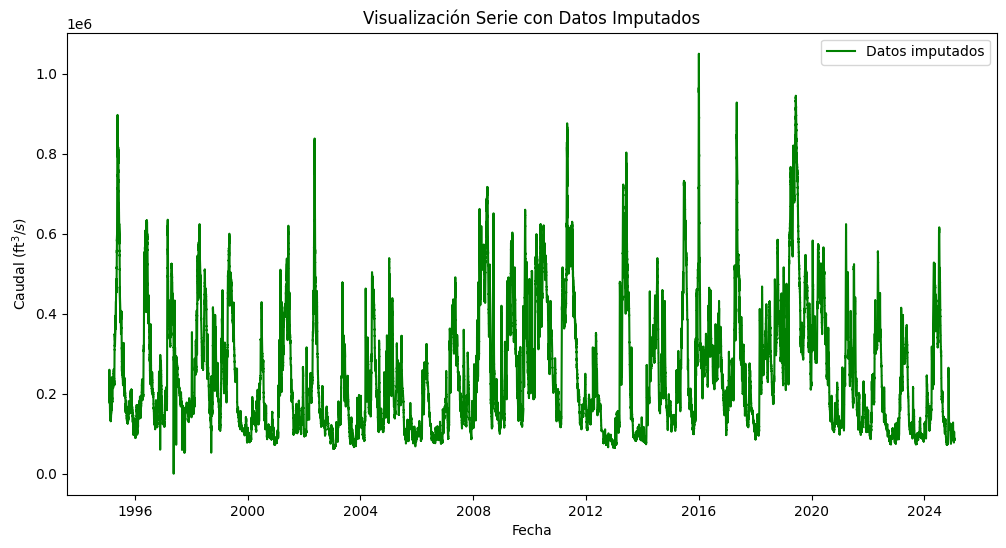

In [ ]:

# Graficar los datos imputados
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(df_resampled.index, df_resampled["height_imputed_arima"], label="Datos imputados", color="green")

# Agregar etiquetas y título
plt.xlabel("Fecha")
plt.ylabel('Caudal ($\mathrm{ft}^3/s$)')
plt.title("Visualización Serie con Datos Imputados")
plt.legend()

# Guardar la gráfica como imagen
plt.savefig("C:/Users/Yuliceth Ramos/AST_Misisipi/EDA/visualizacion_datos_imputados.png", dpi=300, bbox_inches='tight')

# Mostrar la gráfica
plt.show()


In [ ]:
# Descomponer la serie temporal


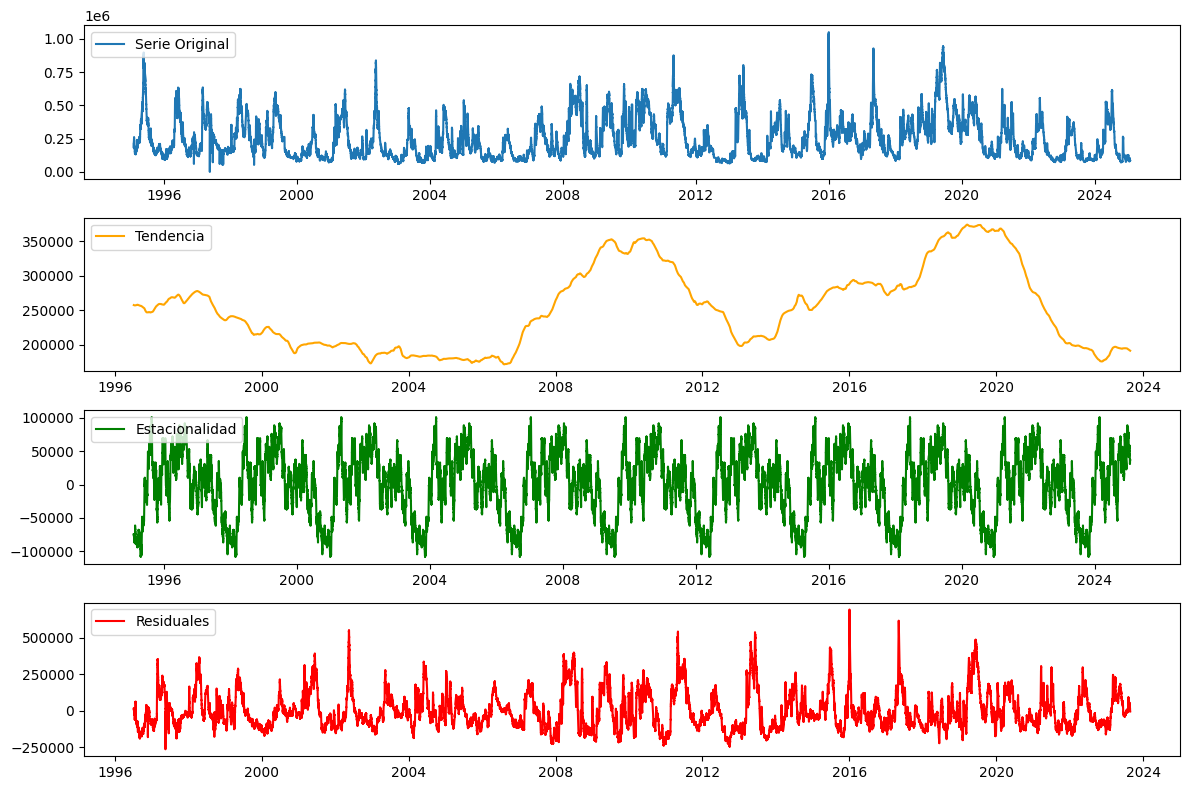

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Descomponer la serie temporal
decomposition = seasonal_decompose(df_resampled['height_imputed_arima'], model='additive', period=50000)

# Graficar los componentes
plt.figure(figsize=(12, 8))

# Gráfico de la serie original
plt.subplot(411)
plt.plot(df_resampled.index, df_resampled['height_imputed_arima'], label='Serie Original')
plt.legend(loc='upper left')

# Gráfico de la tendencia
plt.subplot(412)
plt.plot(df_resampled.index, decomposition.trend, label='Tendencia', color='orange')
plt.legend(loc='upper left')

# Gráfico de la estacionalidad
plt.subplot(413)
plt.plot(df_resampled.index, decomposition.seasonal, label='Estacionalidad', color='green')
plt.legend(loc='upper left')

# Gráfico de los residuales (componentes irregulares)
plt.subplot(414)
plt.plot(df_resampled.index, decomposition.resid, label='Residuales', color='red')
plt.legend(loc='upper left')

plt.tight_layout()
plt.savefig("descomposicion_serie_temporal.png", dpi=300, bbox_inches='tight')
plt.show()



In [ ]:
# Detección de anomalías


C:\Users\Yuliceth Ramos\AppData\Local\Temp\ipykernel_28656\1893373979.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_resampled['month'], y=df_resampled['height_imputed'], palette="Blues")


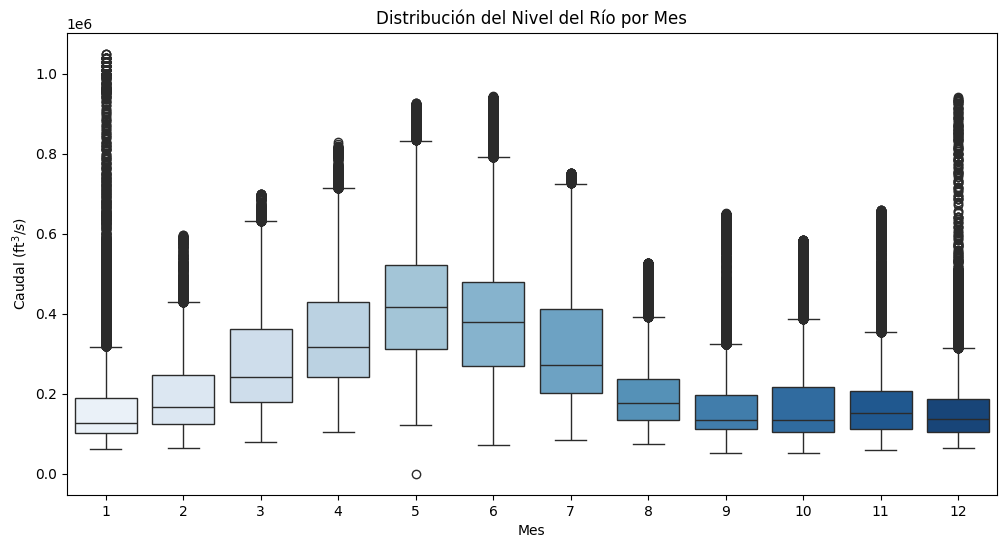

In [ ]:
# Agrupar por mes y crear un gráfico de cajas para comparar distribuciones mensuales
# Asegurar que el índice es de tipo datetime
df_resampled = df_resampled.reset_index()  # Si 'datetime' es el índice, lo convertimos en columna

# Crear la columna 'month' a partir de la fecha
df_resampled['month'] = df_resampled['datetime'].dt.month

# Volver a establecer 'datetime' como índice 
df_resampled = df_resampled.set_index('datetime')

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(x=df_resampled['month'], y=df_resampled['height_imputed'], palette="Blues")
plt.xlabel("Mes")
plt.ylabel('Caudal ($\mathrm{ft}^3/s$)')
plt.title("Distribución del Nivel del Río por Mes")
plt.show()



In [ ]:
# Detección de anomalías


In [ ]:
from scipy.stats import zscore

# Calcular el Z-score para cada valor de la columna 'height_imputed'
z_scores = zscore(df_resampled['height_imputed_arima'])

# Identificar los valores con Z-score mayor a 3 o menor a -3
outliers = df_resampled[abs(z_scores) > 3]

# Mostrar los outliers detectados
print(f"Outliers detectados: {outliers}")


Outliers detectados:                        height  height_imputed  height_imputed_arima  month
datetime                                                                  
1995-05-18 23:00:00  714000.0        714000.0         714000.000000      5
1995-05-18 23:30:00       NaN        712000.0         713259.438362      5
1995-05-19 00:00:00  720000.0        720000.0         720000.000000      5
1995-05-19 00:30:00       NaN        717000.0         718882.493669      5
1995-05-19 01:00:00  720000.0        720000.0         720000.000000      5
...                       ...             ...                   ...    ...
2019-07-05 11:00:00  715000.0        715000.0         715000.000000      7
2019-07-05 11:30:00  714000.0        714000.0         714000.000000      7
2019-07-05 12:30:00  714000.0        714000.0         714000.000000      7
2019-07-05 13:00:00  713000.0        713000.0         713000.000000      7
2019-07-05 13:30:00  713000.0        713000.0         713000.000000      7

[64

In [ ]:
# 3.	Estacionalidad y periodicidad

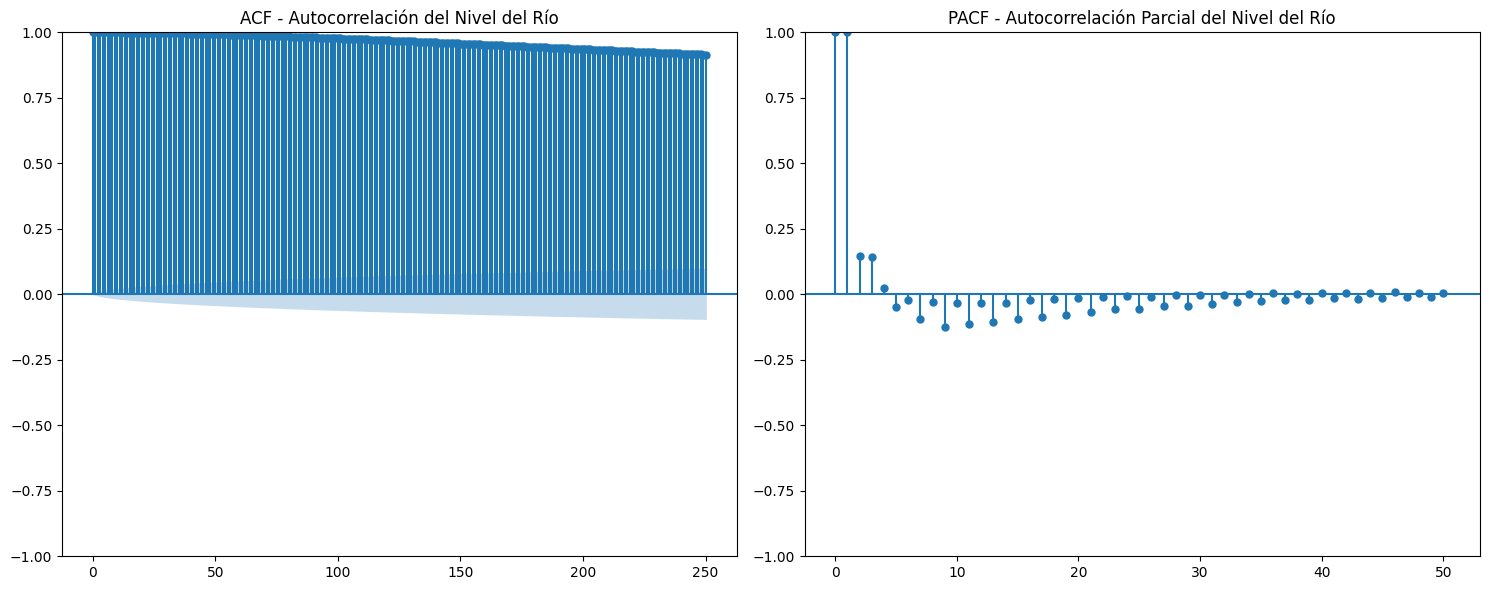

In [ ]:
# Crear una figura con dos subgráficos (uno al lado del otro)

import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Graficar ACF en el primer subgráfico
plot_acf(df_resampled['height_imputed_arima'], lags=250, alpha=0.001, ax=ax1)
ax1.set_title("ACF - Autocorrelación del Nivel del Río")

# Graficar PACF en el segundo subgráfico
plot_pacf(df_resampled['height_imputed_arima'], lags=50, alpha=0.05, ax=ax2)
ax2.set_title("PACF - Autocorrelación Parcial del Nivel del Río")

# Ajustar el espaciado entre las gráficas
plt.tight_layout()
plt.show()



In [ ]:
# Transformación del dominio del tiempo
# Crear una figura con 4 subgráficos (2 arriba, 2 abajo)

# Agregar por diferentes periodos de tiempo
df_monthly = df_resampled['height_imputed'].resample('M').mean()  # Mensual
df_quarterly = df_resampled['height_imputed'].resample('Q').mean()  # Trimestral
df_semiannual = df_resampled['height_imputed'].resample('6M').mean()  # Semestral
df_annual = df_resampled['height_imputed'].resample('A').mean()  # Anual





C:\Users\Yuliceth Ramos\AppData\Local\Temp\ipykernel_28656\1135662482.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df_resampled['height_imputed'].resample('M').mean()  # Mensual
C:\Users\Yuliceth Ramos\AppData\Local\Temp\ipykernel_28656\1135662482.py:6: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  df_quarterly = df_resampled['height_imputed'].resample('Q').mean()  # Trimestral
C:\Users\Yuliceth Ramos\AppData\Local\Temp\ipykernel_28656\1135662482.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_semiannual = df_resampled['height_imputed'].resample('6M').mean()  # Semestral
C:\Users\Yuliceth Ramos\AppData\Local\Temp\ipykernel_28656\1135662482.py:8: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  df_annual = df_resampled['height_imputed'].resample('

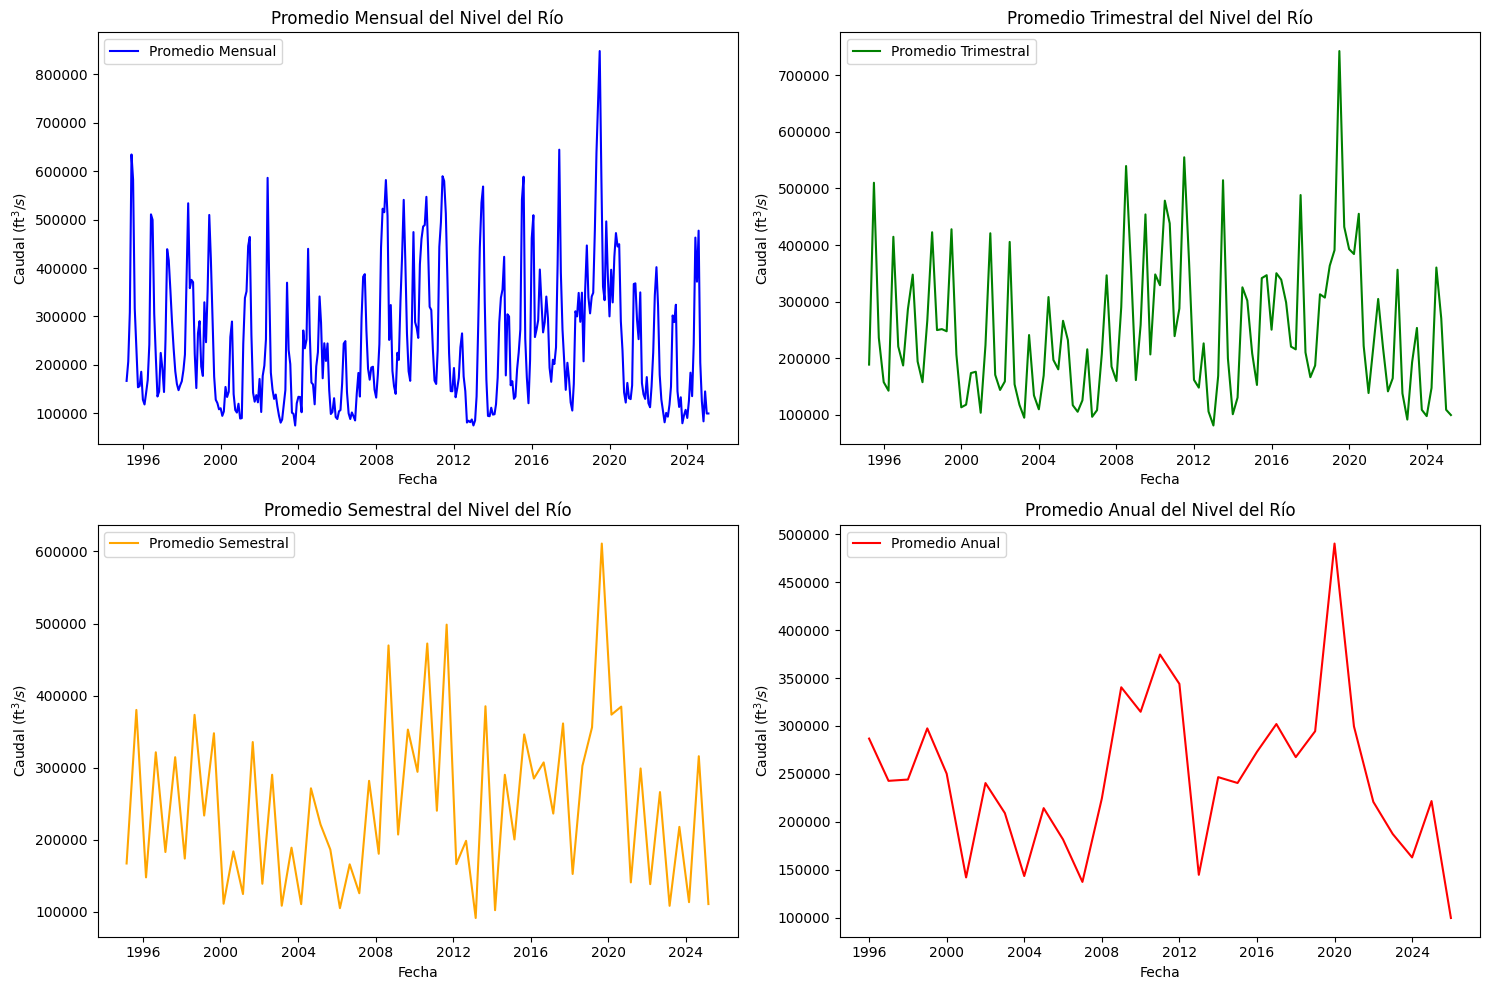

In [ ]:
import matplotlib.pyplot as plt

# Crear figura con 2 filas y 2 columnas
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Graficar el promedio mensual
axs[0, 0].plot(df_monthly.index, df_monthly, label='Promedio Mensual', color='blue')
axs[0, 0].set_title('Promedio Mensual del Nivel del Río')
axs[0, 0].set_xlabel('Fecha')
axs[0, 0].set_ylabel('Caudal ($\mathrm{ft}^3/s$)')
axs[0, 0].legend()

# Graficar el promedio trimestral
axs[0, 1].plot(df_quarterly.index, df_quarterly, label='Promedio Trimestral', color='green')
axs[0, 1].set_title('Promedio Trimestral del Nivel del Río')
axs[0, 1].set_xlabel('Fecha')
axs[0, 1].set_ylabel('Caudal ($\mathrm{ft}^3/s$)')
axs[0, 1].legend()

# Graficar el promedio semestral
axs[1, 0].plot(df_semiannual.index, df_semiannual, label='Promedio Semestral', color='orange')
axs[1, 0].set_title('Promedio Semestral del Nivel del Río')
axs[1, 0].set_xlabel('Fecha')
axs[1, 0].set_ylabel('Caudal ($\mathrm{ft}^3/s$)')
axs[1, 0].legend()

# Graficar el promedio anual
axs[1, 1].plot(df_annual.index, df_annual, label='Promedio Anual', color='red')
axs[1, 1].set_title('Promedio Anual del Nivel del Río')
axs[1, 1].set_xlabel('Fecha')
axs[1, 1].set_ylabel('Caudal ($\mathrm{ft}^3/s$)')
axs[1, 1].legend()

# Ajustar diseño
plt.tight_layout()
plt.show()


In [ ]:
# 4.	Análisis de tendencia

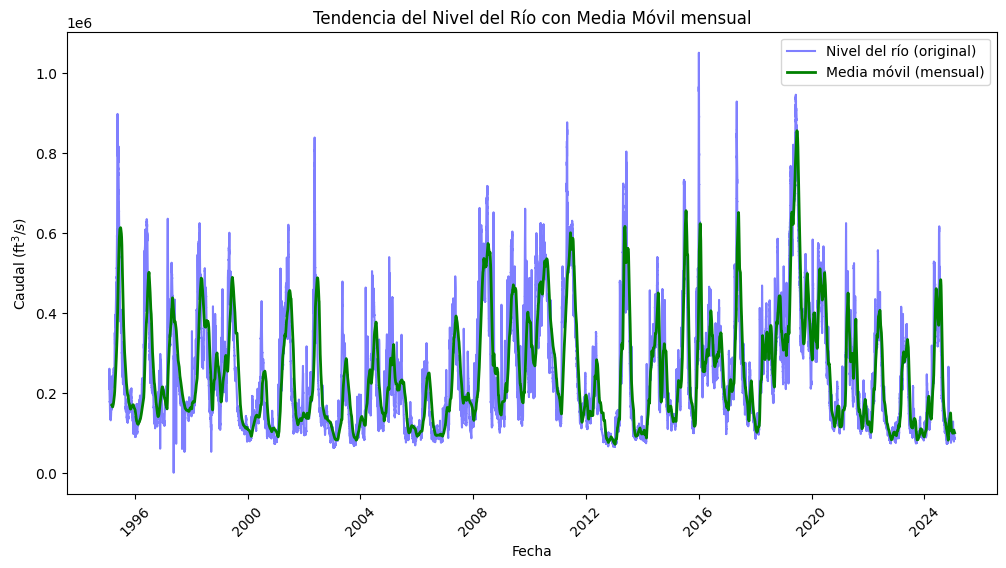

In [ ]:
# Aplicar la media móvil con la ventana de 1440 registros
df["height_moving_avg"] = df["height"].rolling(window=1440).mean()

# Graficar la serie original y la media móvil mensual
plt.figure(figsize=(12, 6))

plt.plot(df["datetime"], df["height"], alpha=0.5, label="Nivel del río (original)", color="blue")
plt.plot(df["datetime"], df["height_moving_avg"], label="Media móvil (mensual)", color="green", linewidth=2)

plt.xlabel("Fecha")
plt.ylabel('Caudal ($\mathrm{ft}^3/s$)')
plt.title("Tendencia del Nivel del Río con Media Móvil mensual")
plt.xticks(rotation=45)
plt.legend()

plt.show()


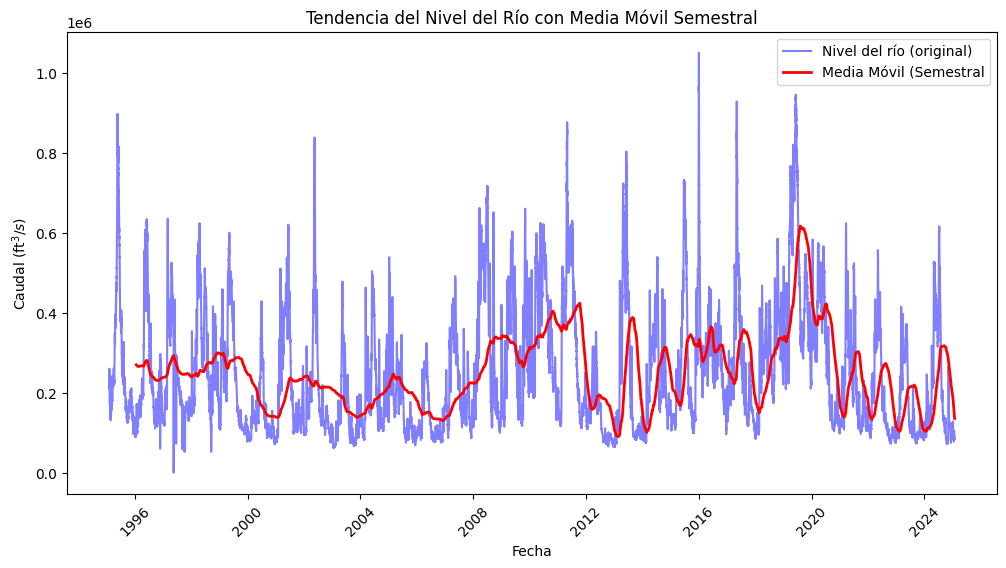

In [ ]:
# Media móvil Semestral
df["height_moving_avg"] = df["height"].rolling(window=8640).mean()

# Graficar la serie original y la media móvil
plt.figure(figsize=(12, 6))
plt.plot(df["datetime"], df["height"], alpha=0.5, label="Nivel del río (original)", color="blue")
plt.plot(df["datetime"], df["height_moving_avg"], label="Media Móvil (Semestral", color="red", linewidth=2)

plt.xlabel("Fecha")
plt.ylabel('Caudal ($\mathrm{ft}^3/s$)')
plt.title("Tendencia del Nivel del Río con Media Móvil Semestral")
plt.xticks(rotation=45)
plt.legend()
plt.show()


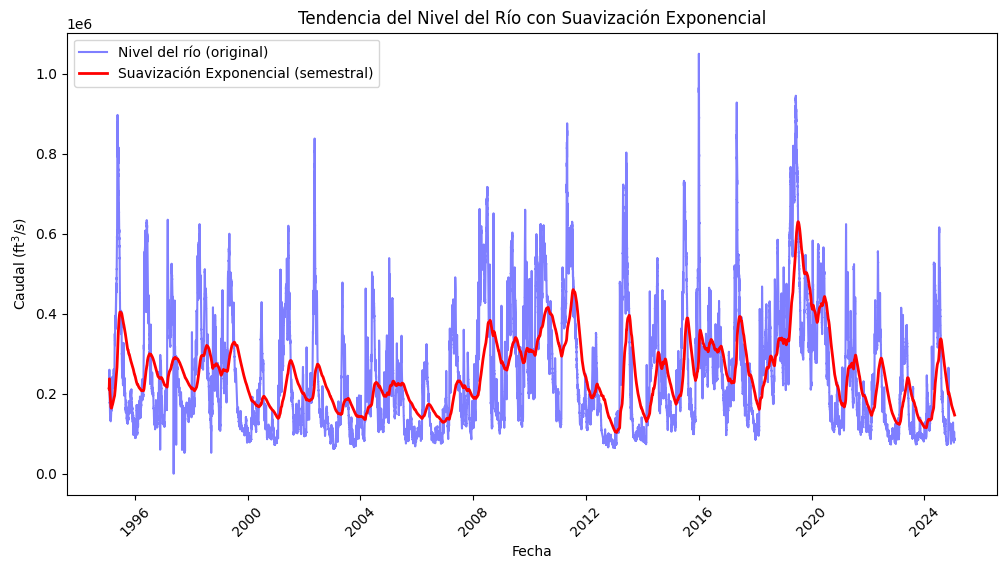

In [ ]:
# Suavización exponencial con un factor de suavización alpha
df["height_ewm"] = df["height"].ewm(span=8640).mean()  #semestral

# Graficar la serie original y el suavizado exponencial
plt.figure(figsize=(12, 6))
plt.plot(df["datetime"], df["height"], alpha=0.5, label="Nivel del río (original)", color="blue")
plt.plot(df["datetime"], df["height_ewm"], label="Suavización Exponencial (semestral)", color="red", linewidth=2)

plt.xlabel("Fecha")
plt.ylabel('Caudal ($\mathrm{ft}^3/s$)')
plt.title("Tendencia del Nivel del Río con Suavización Exponencial")
plt.xticks(rotation=45)
plt.legend()
plt.show()


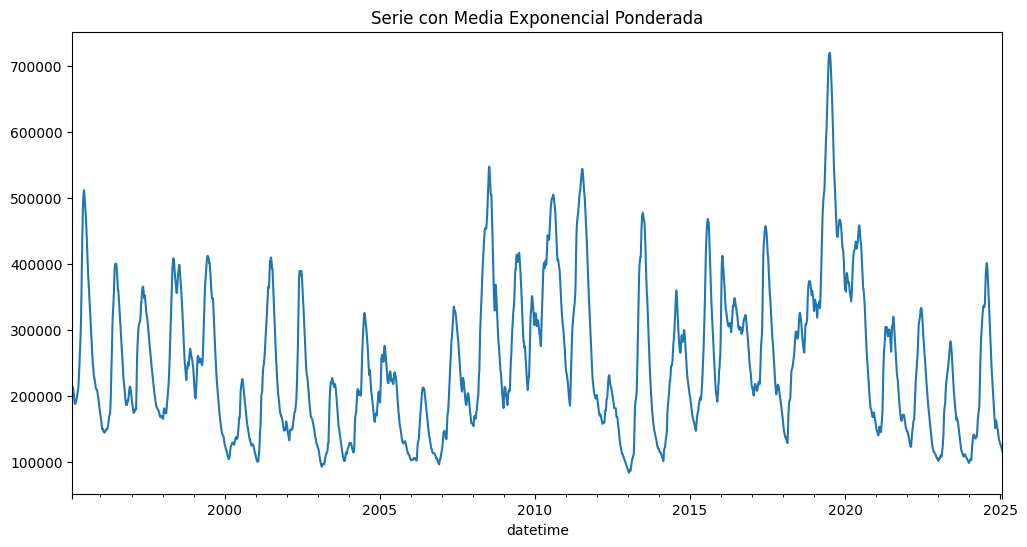

In [ ]:
# Aplicar suavización exponencial ponderada
df_resampled['height_ewm'] = df_resampled['height_imputed'].ewm(span=4820, adjust=False).mean()

# Graficar la serie suavizada
df_resampled['height_ewm'].plot(figsize=(12, 6), title="Serie con Media Exponencial Ponderada")
plt.show()


In [ ]:
from statsmodels.tsa.stattools import adfuller

# Aplicar la prueba ADF
result = adfuller(df["height"].dropna())  # Eliminar valores nulos
print(f'Estadístico ADF: {result[0]}')
print(f'Valor p: {result[1]}')
print(f'Valores críticos: {result[4]}')

if result[1] < 0.05:
    print("Rechazamos la hipótesis nula: los datos son estacionarios.")
else:
    print("No podemos rechazar la hipótesis nula: los datos no son estacionarios.")


Estadístico ADF: -10.271382707554162
Valor p: 3.9931950914494306e-18
Valores críticos: {'1%': -3.4303678676510305, '5%': -2.8615478972850723, '10%': -2.5667742034374763}
Rechazamos la hipótesis nula: los datos son estacionarios.


In [ ]:
from statsmodels.tsa.stattools import kpss

# Aplicar la prueba KPSS
result_kpss = kpss(df["height"].dropna(), regression='c')  # 'c' para prueba de nivel
print(f'Estadístico KPSS: {result_kpss[0]}')
print(f'Valor p: {result_kpss[1]}')
print(f'Valores críticos: {result_kpss[3]}')

if result_kpss[1] < 0.05:
    print("Rechazamos la hipótesis nula: los datos no son estacionarios.")
else:
    print("No podemos rechazar la hipótesis nula: los datos son estacionarios.")


Estadístico KPSS: 1.82020199176406
Valor p: 0.01
Valores críticos: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
Rechazamos la hipótesis nula: los datos no son estacionarios.


C:\Users\Yuliceth Ramos\AppData\Local\Temp\ipykernel_28656\1962471898.py:4: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result_kpss = kpss(df["height"].dropna(), regression='c')  # 'c' para prueba de nivel


C:\Users\Yuliceth Ramos\AppData\Local\Temp\ipykernel_28656\3909271696.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  subsample = df_resampled['height_imputed'].resample('6M')  # '6M' para cada 6 meses


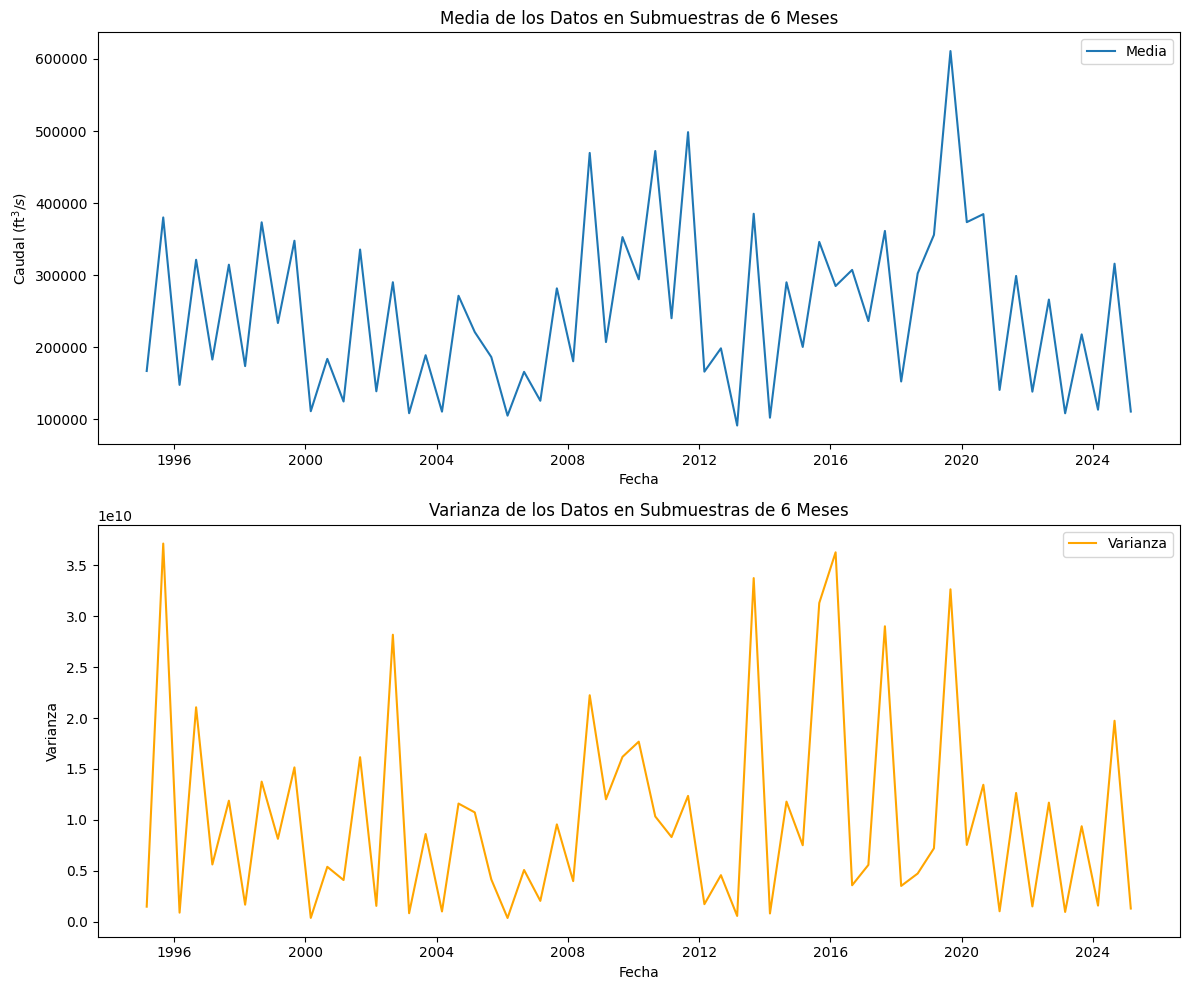

In [ ]:

# Dividir los datos en submuestras (cada 6 meses) y calcular la media y varianza
subsample = df_resampled['height_imputed'].resample('6M')  # '6M' para cada 6 meses

# Calcular la media y la varianza de cada submuestra
mean_subsamples = subsample.mean()
var_subsamples = subsample.var()

# Graficar la media y la varianza en función del tiempo
fig, ax = plt.subplots(2, 1, figsize=(12, 10))

# Gráfico de la media
ax[0].plot(mean_subsamples.index, mean_subsamples, label='Media')
ax[0].set_title('Media de los Datos en Submuestras de 6 Meses')
ax[0].set_xlabel('Fecha')
ax[0].set_ylabel('Caudal ($\mathrm{ft}^3/s$)')
ax[0].legend()

# Gráfico de la varianza
ax[1].plot(var_subsamples.index, var_subsamples, label='Varianza', color='orange')
ax[1].set_title('Varianza de los Datos en Submuestras de 6 Meses')
ax[1].set_xlabel('Fecha')
ax[1].set_ylabel('Varianza')
ax[1].legend()

# Ajustar el espaciado y mostrar las gráficas
plt.tight_layout()
plt.show()



c:\Users\Yuliceth Ramos\.conda\envs\ml-env\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


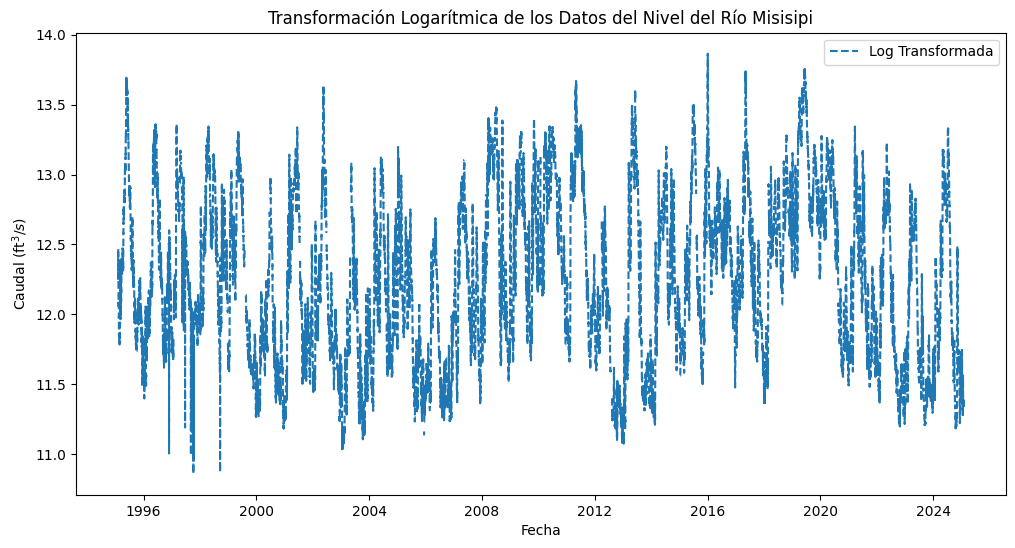

In [ ]:
# 6.2. Transformaciones de datos 
# Aplicar logaritmo a la serie para estabilizar la varianza
import numpy as np
df_resampled['height_log'] = np.log(df_resampled['height_imputed'])

# Graficar para comparar la serie original con la transformada
plt.figure(figsize=(12, 6))
plt.plot(df_resampled.index, df_resampled['height_log'], label='Log Transformada', linestyle='--')
plt.title('Transformación Logarítmica de los Datos del Nivel del Río Misisipi')
plt.xlabel('Fecha')
plt.ylabel('Caudal ($\mathrm{ft}^3/s$)')
plt.legend()
plt.show()


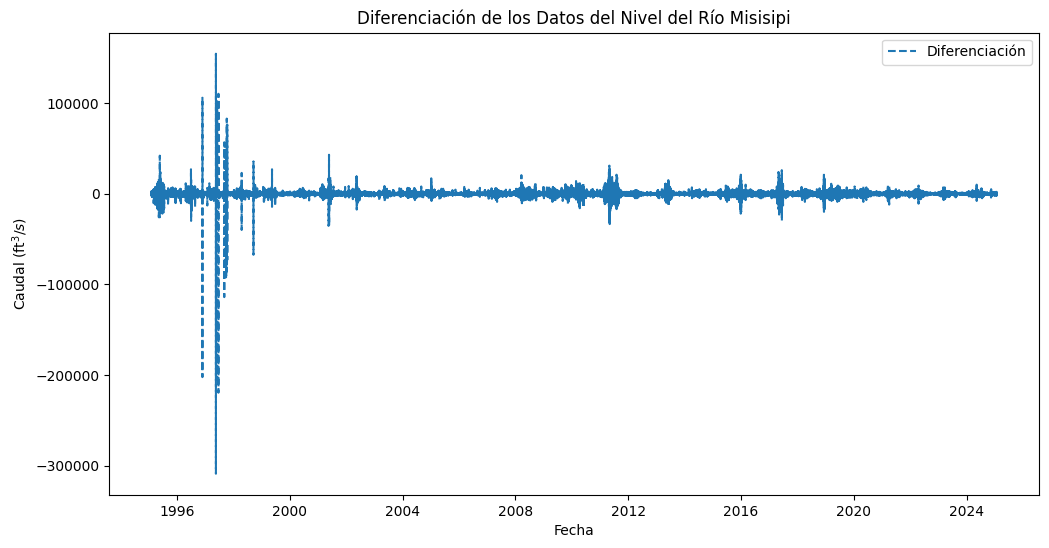

In [ ]:
# Diferenciación de la serie para eliminar la tendencia
df_resampled['height_diff'] = df_resampled['height_imputed'].diff()

# Graficar para comparar la serie original con la diferenciada
plt.figure(figsize=(12, 6))
plt.plot(df_resampled.index, df_resampled['height_diff'], label='Diferenciación', linestyle='--')
plt.title('Diferenciación de los Datos del Nivel del Río Misisipi')
plt.xlabel('Fecha')
plt.ylabel('Caudal ($\mathrm{ft}^3/s$)')
plt.legend()
plt.show()


In [ ]:
from statsmodels.tsa.stattools import adfuller

# Realizar la prueba ADF en la serie diferenciada
adf_test = adfuller(df_resampled['height_diff'].dropna())

# Mostrar los resultados de la prueba ADF
print(f'Estadístico ADF: {adf_test[0]}')
print(f'Valor p: {adf_test[1]}')
print(f'Valores críticos: {adf_test[4]}')

# Evaluar si la serie es estacionaria
if adf_test[1] < 0.05:
    print("La serie es estacionaria según la prueba ADF.")
else:
    print("La serie no es estacionaria según la prueba ADF.")


Estadístico ADF: -47.1974772256423
Valor p: 0.0
Valores críticos: {'1%': -3.4303629087866403, '5%': -2.8615457055319165, '10%': -2.566773036846194}
La serie es estacionaria según la prueba ADF.


In [ ]:
from statsmodels.tsa.stattools import kpss

# Realizar la prueba KPSS en la serie diferenciada
kpss_test = kpss(df_resampled['height_diff'].dropna(), regression='c')

# Mostrar los resultados de la prueba KPSS
print(f'Estadístico KPSS: {kpss_test[0]}')
print(f'Valor p: {kpss_test[1]}')
print(f'Valores críticos: {kpss_test[3]}')

# Evaluar si la serie es estacionaria
if kpss_test[1] < 0.05:
    print("La serie no es estacionaria según la prueba KPSS.")
else:
    print("La serie es estacionaria según la prueba KPSS.")


Estadístico KPSS: 0.00746979323663413
Valor p: 0.1
Valores críticos: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
La serie es estacionaria según la prueba KPSS.


C:\Users\Yuliceth Ramos\AppData\Local\Temp\ipykernel_28656\4222782175.py:4: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_test = kpss(df_resampled['height_diff'].dropna(), regression='c')


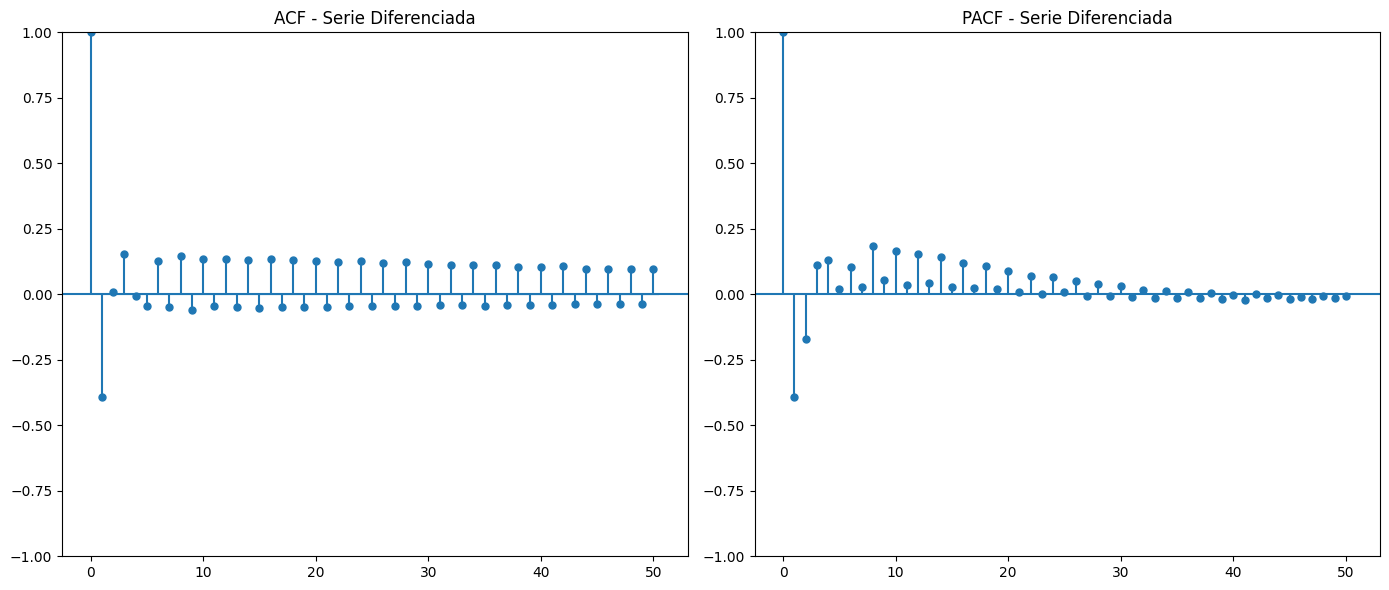

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Graficar ACF y PACF para la serie diferenciada
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# ACF
plot_acf(df_resampled['height_diff'].dropna(), lags=50, ax=axs[0], alpha=0.05)
axs[0].set_title('ACF - Serie Diferenciada')

# PACF
plot_pacf(df_resampled['height_diff'].dropna(), lags=50, ax=axs[1], alpha=0.05)
axs[1].set_title('PACF - Serie Diferenciada')

plt.tight_layout()
plt.show()


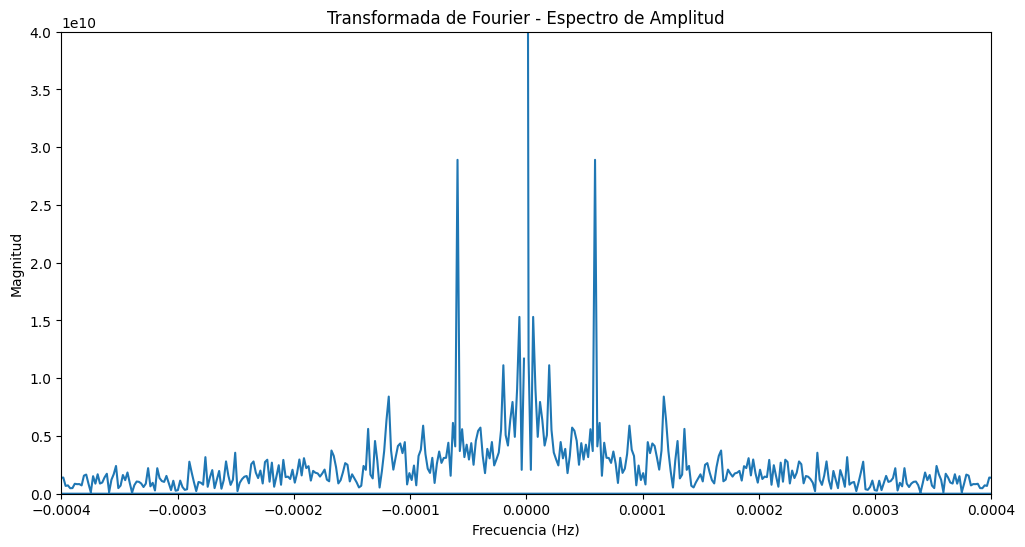

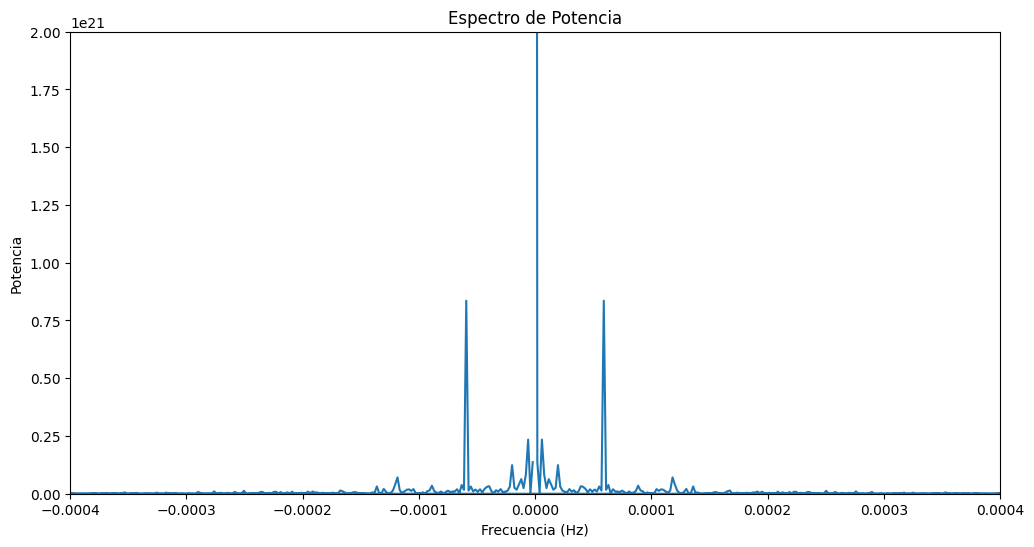

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Realizar la transformada de Fourier
# Suponemos que df_resampled['height_imputed'] es la serie temporal
data = df_resampled['height_imputed'].dropna()

# Realizar la FFT (Transformada Rápida de Fourier)
fft_result = np.fft.fft(data)
fft_freq = np.fft.fftfreq(len(data))

# Obtener la magnitud de la FFT (espectro de amplitud)
fft_magnitude = np.abs(fft_result)

# Graficar el espectro de amplitud
plt.figure(figsize=(12, 6))
plt.plot(fft_freq, fft_magnitude)
plt.title("Transformada de Fourier - Espectro de Amplitud")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Magnitud")
plt.xlim(-0.0004, 0.0004) 
plt.ylim(0, 4e10) 
plt.show()

# Para visualizar el espectro de potencia, se calcula el cuadrado de la magnitud
power_spectrum = np.square(fft_magnitude)

# Graficar el espectro de potencia
plt.figure(figsize=(12, 6))
plt.plot(fft_freq, power_spectrum)
plt.title("Espectro de Potencia")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Potencia")
plt.xlim(-0.0004, 0.0004) 
plt.ylim(0, 0.2e22) 
plt.show()


In [ ]:
# Calcular el IQR
Q1 = df_resampled['height_imputed'].quantile(0.25)
Q3 = df_resampled['height_imputed'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites superior e inferior
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar los valores atípicos
outliers_iqr = df_resampled[(df_resampled['height_imputed'] < lower_bound) | (df_resampled['height_imputed'] > upper_bound)]

# Mostrar los outliers
print(outliers_iqr)


                       height  height_imputed  height_imputed_arima  month  \
datetime                                                                     
1995-05-18 05:00:00  651000.0        651000.0         651000.000000      5   
1995-05-18 06:00:00  650000.0        650000.0         650000.000000      5   
1995-05-18 06:30:00       NaN        650500.0         649662.116422      5   
1995-05-18 07:00:00  657000.0        657000.0         657000.000000      5   
1995-05-18 07:30:00       NaN        653500.0         655815.249622      5   
...                       ...             ...                   ...    ...   
2019-07-09 07:30:00  651000.0        651000.0         651000.000000      7   
2019-07-09 08:00:00  651000.0        651000.0         651000.000000      7   
2019-07-09 08:30:00  650000.0        650000.0         650000.000000      7   
2019-07-09 09:30:00  650000.0        650000.0         650000.000000      7   
2019-07-09 10:30:00  650000.0        650000.0         650000.000

Conversión de frecuencia de los datos a 60 minutos

In [ ]:

import pandas as pd
import seaborn as sns
import warnings
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Cargar los datos desde Google Drive
df = pd.read_csv('G:\Mi unidad\Modelado_Misisipi/Datos_Limpios_Mississippi.csv')

# Verificar si la columna 'datetime' existe antes de convertirla
if 'datetime' in df.columns:
    # Especificar el formato correcto para las fechas
    df['datetime'] = pd.to_datetime(df['datetime'], format='%d/%m/%Y %H:%M')  # Convertir a formato de fecha
    df.set_index('datetime', inplace=True)  # Establecerla como índice
else:
    print("Advertencia: No se encontró la columna 'datetime' en los datos.")

# Verificar que el encabezado de la columna de datos esté correctamente ajustado a 'Caudal'
if 'Caudal' in df.columns:
    print("La columna 'Caudal' se encuentra correctamente.")
else:
    print("Advertencia: No se encontró la columna 'Caudal' en los datos.")

# Verificar valores nulos, NaN, ceros, negativos y no numéricos
valores_nulos = df['Caudal'].isnull().sum()  # Cantidad de valores nulos
valores_nan = df['Caudal'].isna().sum()      # Cantidad de NaN (aunque isnull() y isna() son equivalentes)
valores_ceros = (df['Caudal'] == 0).sum()    # Cantidad de ceros
valores_negativos = (df['Caudal'] < 0).sum() # Cantidad de valores negativos
valores_no_numericos = df['Caudal'].apply(pd.to_numeric, errors='coerce').isna().sum()  # valores no convertibles a numérico

# Mostrar los resultados
print(f"Valores nulos: {valores_nulos}")
print(f"Valores NaN: {valores_nan}")
print(f"Valores ceros: {valores_ceros}")
print(f"Valores negativos: {valores_negativos}")
print(f"Valores no numéricos: {valores_no_numericos}")

# Ver las primeras filas para asegurarnos de que los datos están bien cargados
print(df.head())



La columna 'Caudal' se encuentra correctamente.
Valores nulos: 0
Valores NaN: 0
Valores ceros: 1
Valores negativos: 0
Valores no numéricos: 0
                     Caudal
datetime                   
1995-02-03 14:00:00  212000
1995-02-03 14:21:00  211000
1995-02-03 15:00:00  211000
1995-02-03 15:21:00  211000
1995-02-03 16:00:00  211000


In [ ]:
# 1. Ver la totalidad de los datos por fila
# Mostrar todas las columnas del DataFrame para asegurar que no se omiten
pd.set_option('display.max_columns', None)  # Mostrar todas las columnas
print(df.head())  # Ver las primeras filas del DataFrame

# Imprimir la cantidad total de datos (número de filas)
total_datos = df.shape[0]
print(f"La cantidad total de datos es: {total_datos} registros.")

# 2. Verificar si la frecuencia de los datos es regular o irregular
# Calcular la diferencia de tiempo entre registros consecutivos
df['time_diff'] = df.index.to_series().diff()  # Calcular la diferencia de tiempo

# Revisar si las diferencias son constantes
diferencias_unicas = df['time_diff'].nunique()  # Número de diferencias únicas

if diferencias_unicas == 1:
    print("La frecuencia de los datos es regular.")
else:
    print("La frecuencia de los datos es irregular.")

# Mostrar algunas diferencias de tiempo
print("Algunas diferencias de tiempo:")
print(df['time_diff'].head())  # Mostrar las primeras diferencias de tiempo



                     Caudal
datetime                   
1995-02-03 14:00:00  212000
1995-02-03 14:21:00  211000
1995-02-03 15:00:00  211000
1995-02-03 15:21:00  211000
1995-02-03 16:00:00  211000
La cantidad total de datos es: 366082 registros.
La frecuencia de los datos es irregular.
Algunas diferencias de tiempo:
datetime
1995-02-03 14:00:00               NaT
1995-02-03 14:21:00   0 days 00:21:00
1995-02-03 15:00:00   0 days 00:39:00
1995-02-03 15:21:00   0 days 00:21:00
1995-02-03 16:00:00   0 days 00:39:00
Name: time_diff, dtype: timedelta64[ns]


In [ ]:
# Eliminar registros duplicados con la misma marca de tiempo exacta
df_clean = df[~df.index.duplicated(keep='first')]

# Mostrar los primeros registros después de la limpieza
print(df_clean.head())

# Guardar el DataFrame limpio en Google Drive
df_clean.to_csv('G:\Mi unidad\Modelado_Misisipi/Datos_Limpios_Sin_Duplicados.csv')


                     Caudal       time_diff
datetime                                   
1995-02-03 14:00:00  212000             NaT
1995-02-03 14:21:00  211000 0 days 00:21:00
1995-02-03 15:00:00  211000 0 days 00:39:00
1995-02-03 15:21:00  211000 0 days 00:21:00
1995-02-03 16:00:00  211000 0 days 00:39:00


In [ ]:
# Imprimir la cantidad total de datos (número de filas)
total_datos = df.shape[0]
print(f"La cantidad total de datos es: {total_datos} registros.")

La cantidad total de datos es: 366082 registros.


In [ ]:
import pandas as pd

# Asegurar que datetime sea el índice
df_clean = df_clean.sort_index()  # Ordenar por fecha
df_regular = df_clean.asfreq('T')  # 'T' para frecuencia de 1 minuto

# Calcular diferencias de tiempo
df_regular['time_diff'] = df_regular.index.to_series().diff()  # Diferencia entre registros
df_regular['time_diff_minutos'] = df_regular['time_diff'].dt.total_seconds() / 60  # En minutos
df_regular['time_diff_segundos'] = df_regular['time_diff'].dt.total_seconds()  # En segundos

# Guardar el DataFrame con NaN en los espacios faltantes
df_regular.to_csv('C:\AST_Misisipi\Modelado_Misisipi/Datos_Regularizados_Solo_Celdas.csv')

# Mostrar las primeras filas para verificar
print(df_regular.head(15))

                       Caudal       time_diff  time_diff_minutos  \
datetime                                                           
1995-02-03 14:00:00  212000.0             NaT                NaN   
1995-02-03 14:01:00       NaN 0 days 00:01:00                1.0   
1995-02-03 14:02:00       NaN 0 days 00:01:00                1.0   
1995-02-03 14:03:00       NaN 0 days 00:01:00                1.0   
1995-02-03 14:04:00       NaN 0 days 00:01:00                1.0   
1995-02-03 14:05:00       NaN 0 days 00:01:00                1.0   
1995-02-03 14:06:00       NaN 0 days 00:01:00                1.0   
1995-02-03 14:07:00       NaN 0 days 00:01:00                1.0   
1995-02-03 14:08:00       NaN 0 days 00:01:00                1.0   
1995-02-03 14:09:00       NaN 0 days 00:01:00                1.0   
1995-02-03 14:10:00       NaN 0 days 00:01:00                1.0   
1995-02-03 14:11:00       NaN 0 days 00:01:00                1.0   
1995-02-03 14:12:00       NaN 0 days 00:01:00   

In [ ]:
# Paso 1: Rellenar con el último valor conocido (Forward Fill)
df_regular['Caudal'] = df_regular['Caudal'].ffill()

# Paso 2: Suavizar con media móvil de 5 minutos (Rolling Window)
df_regular['Caudal'] = df_regular['Caudal'].rolling(window=5, min_periods=1).mean()

# Guardar el DataFrame con los valores rellenados
df_regular.to_csv('C:\AST_Misisipi\Modelado_Misisipi/Datos_Completos.csv')

# Mostrar los primeros valores para verificar
print(df_regular.head(15))

                       Caudal       time_diff  time_diff_minutos  \
datetime                                                           
1995-02-03 14:00:00  212000.0             NaT                NaN   
1995-02-03 14:01:00  212000.0 0 days 00:01:00                1.0   
1995-02-03 14:02:00  212000.0 0 days 00:01:00                1.0   
1995-02-03 14:03:00  212000.0 0 days 00:01:00                1.0   
1995-02-03 14:04:00  212000.0 0 days 00:01:00                1.0   
1995-02-03 14:05:00  212000.0 0 days 00:01:00                1.0   
1995-02-03 14:06:00  212000.0 0 days 00:01:00                1.0   
1995-02-03 14:07:00  212000.0 0 days 00:01:00                1.0   
1995-02-03 14:08:00  212000.0 0 days 00:01:00                1.0   
1995-02-03 14:09:00  212000.0 0 days 00:01:00                1.0   
1995-02-03 14:10:00  212000.0 0 days 00:01:00                1.0   
1995-02-03 14:11:00  212000.0 0 days 00:01:00                1.0   
1995-02-03 14:12:00  212000.0 0 days 00:01:00   

In [ ]:
import pandas as pd

# Cargar el archivo CSV
df = pd.read_csv('C:\AST_Misisipi\Modelado_Misisipi/Datos_Completos.csv')

# Contar el número total de filas
num_filas = df.shape[0]

# Mostrar el resultado
print(f"Total de filas en el archivo: {num_filas}")

Total de filas en el archivo: 15767941


In [ ]:
import pandas as pd

# Cargar la serie de 1 minuto
df = pd.read_csv('C:\AST_Misisipi\Modelado_Misisipi/Datos_Completos.csv', index_col='datetime', parse_dates=True)

# Aplicar media móvil con ventana de 60 minutos
df['Caudal_mm'] = df['Caudal'].rolling(window=60, min_periods=1).mean()

# Resamplear a cada hora, tomando el último valor de la media móvil
df_horario = df.resample('H').last()

# Guardar el resultado
df_horario.to_csv('C:\AST_Misisipi\Modelado_Misisipi/Datos_Horarios.csv')

# Mostrar las primeras filas del nuevo DataFrame
print(df_horario.head())

                       Caudal        time_diff  time_diff_minutos  \
datetime                                                            
1995-02-03 14:00:00  211000.0  0 days 00:01:00                1.0   
1995-02-03 15:00:00  211000.0  0 days 00:01:00                1.0   
1995-02-03 16:00:00  212000.0  0 days 00:01:00                1.0   
1995-02-03 17:00:00  212000.0  0 days 00:01:00                1.0   
1995-02-03 18:00:00  212000.0  0 days 00:01:00                1.0   

                     time_diff_segundos      Caudal_mm  
datetime                                                
1995-02-03 14:00:00                60.0  211383.333333  
1995-02-03 15:00:00                60.0  211000.000000  
1995-02-03 16:00:00                60.0  211616.666667  
1995-02-03 17:00:00                60.0  212000.000000  
1995-02-03 18:00:00                60.0  212000.000000  


In [ ]:
import pandas as pd

# Cargar el DataFrame reducido
df = pd.read_csv('C:\AST_Misisipi\Modelado_Misisipi/Datos_Horarios.csv', index_col=0, parse_dates=True)

# Convertir todas las columnas a tipo numérico, forzando errores a NaN si hay datos no convertibles
df = df.apply(pd.to_numeric, errors='coerce')

# Verificar la cantidad de datos después de la reducción a cada hora
total_datos = len(df)
print(f"Total de datos después de reducir la serie a cada hora: {total_datos}")

Total de datos después de reducir la serie a cada hora: 262800


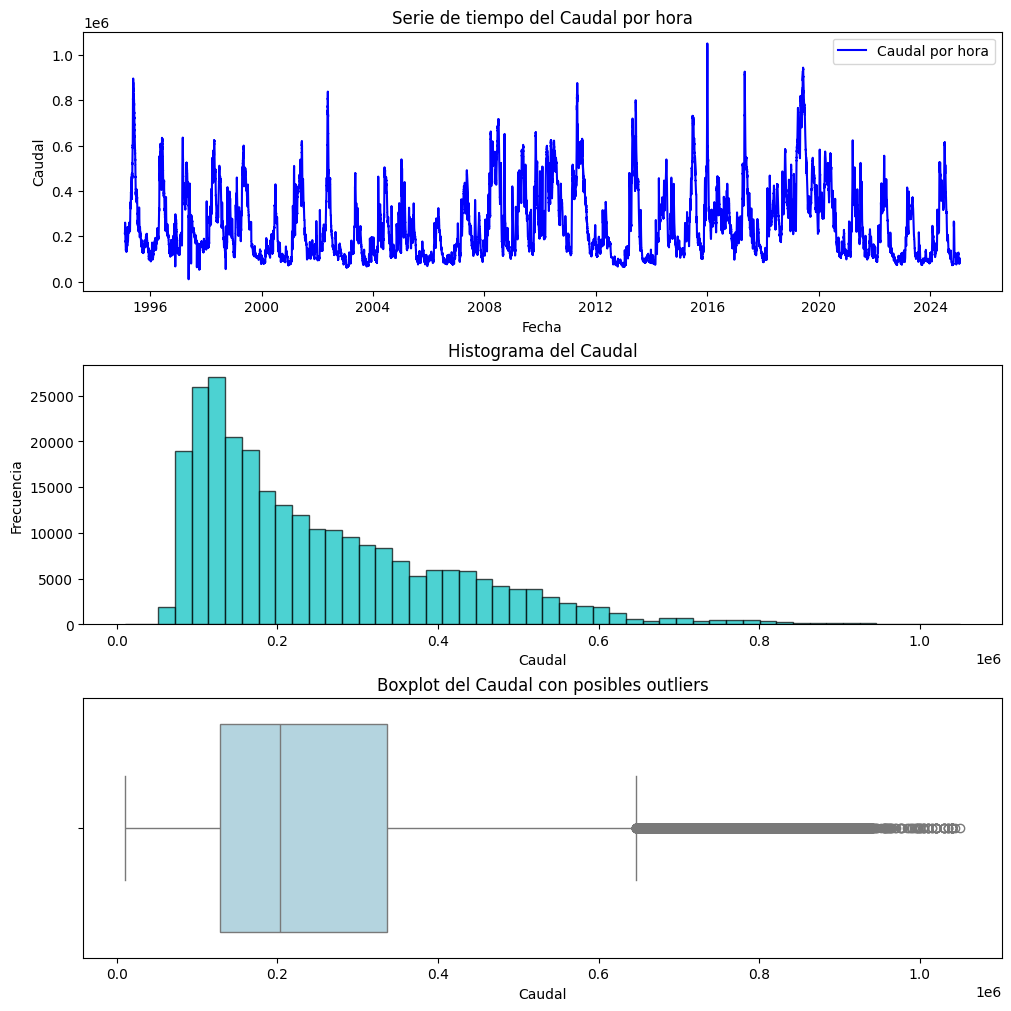

Outliers detectados con IQR: 5018
Outliers detectados con Z-score: 3235


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

# Crear una figura con 3 subgráficos en una columna
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 10), constrained_layout=True)

# 1. Gráfico de la serie temporal
axes[0].plot(df.index, df["Caudal_mm"], label="Caudal por hora", color='b')
axes[0].set_xlabel("Fecha")
axes[0].set_ylabel("Caudal")
axes[0].set_title("Serie de tiempo del Caudal por hora")
axes[0].legend()

# 2. Histograma
axes[1].hist(df["Caudal_mm"], bins=50, edgecolor='black', alpha=0.7, color='c')
axes[1].set_xlabel("Caudal")
axes[1].set_ylabel("Frecuencia")
axes[1].set_title("Histograma del Caudal")

# 3. Boxplot
sns.boxplot(x=df["Caudal_mm"], color="lightblue", ax=axes[2])
axes[2].set_xlabel("Caudal")
axes[2].set_title("Boxplot del Caudal con posibles outliers")

plt.show()

# Detección de outliers con IQR
Q1 = df["Caudal_mm"].quantile(0.25)
Q3 = df["Caudal_mm"].quantile(0.75)
IQR = Q3 - Q1

# Umbrales
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtrar outliers
outliers_iqr = df[(df["Caudal_mm"] < limite_inferior) |
                           (df["Caudal_mm"] > limite_superior)]
print(f"Outliers detectados con IQR: {len(outliers_iqr)}")

# Detección de outliers con Z-score
z_scores = zscore(df["Caudal_mm"])
outliers_z = df[np.abs(z_scores) > 3]
print(f"Outliers detectados con Z-score: {len(outliers_z)}")

In [ ]:
# Calcular estadísticas generales
estadisticas = df["Caudal_mm"].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95])

# Identificar valores altos
percentil_95 = estadisticas["95%"]
num_valores_altos = (df["Caudal_mm"] > percentil_95).sum()

# Imprimir resultados
print("Estadísticas generales de la serie:")
print(estadisticas)
print(f"\nCantidad de valores por encima del percentil 95 ({percentil_95:.2f}): {num_valores_altos}")

Estadísticas generales de la serie:
count    2.628000e+05
mean     2.505132e+05
std      1.538411e+05
min      1.030000e+04
5%       8.700667e+04
25%      1.290000e+05
50%      2.030000e+05
75%      3.360750e+05
95%      5.500000e+05
max      1.050000e+06
Name: Caudal_mm, dtype: float64

Cantidad de valores por encima del percentil 95 (550000.00): 13053


Se ha creado la columna 'Caudal_log' y el nuevo archivo ha sido guardado en:
C:/AST_Misisipi/Modelado_Misisipi/Datos_Caudal_Horario_Log.csv
                         Caudal_mm  Caudal_log
datetime                                      
1995-02-03 14:00:00  211383.333333   12.261429
1995-02-03 15:00:00  211000.000000   12.259613
1995-02-03 16:00:00  211616.666667   12.262532
1995-02-03 17:00:00  212000.000000   12.264342
1995-02-03 18:00:00  212000.000000   12.264342


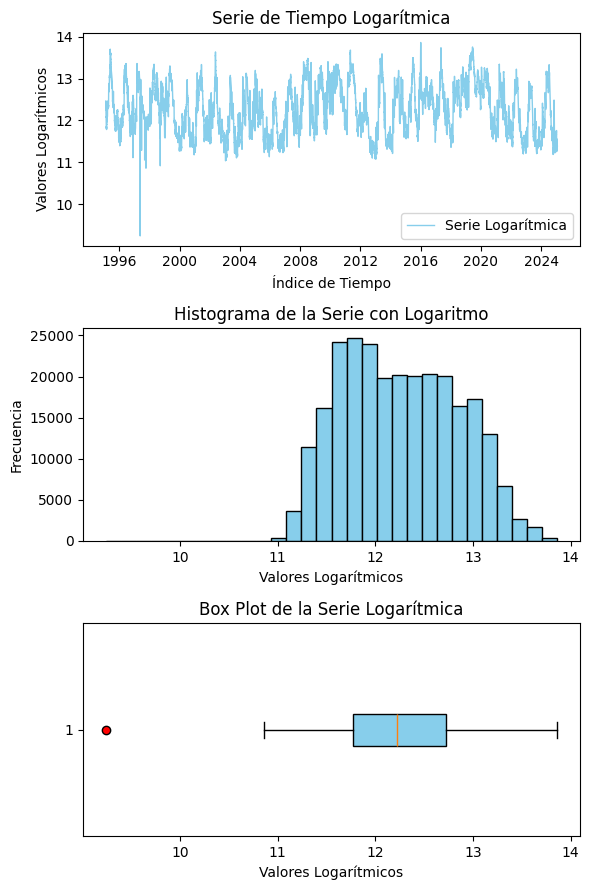

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

# Configuración general
warnings.filterwarnings("ignore")

# Cargar el DataFrame original
df = pd.read_csv('C:/AST_Misisipi/Modelado_Misisipi/Datos_Horarios.csv', index_col=0, parse_dates=True)

# Aplicar logaritmo a la columna 'Caudal_mm' y crear una nueva columna 'Caudal_log'
df['Caudal_log'] = np.log(df['Caudal_mm'].replace(0, np.nan))  

# Guardar el DataFrame con la nueva columna logarítmica
output_path = 'C:/AST_Misisipi/Modelado_Misisipi/Datos_Caudal_Horario_Log.csv'
df.to_csv(output_path)

# Confirmar la creación de la columna y la ruta del archivo guardado
print(f"Se ha creado la columna 'Caudal_log' y el nuevo archivo ha sido guardado en:\n{output_path}")
print(df[['Caudal_mm', 'Caudal_log']].head())  # Mostrar las primeras filas de las columnas clave

# Crear figura y ejes
plt.figure(figsize=(6, 9))  # Ajustamos el tamaño para que quepan bien las tres gráficas

# 1. Serie de tiempo logarítmica
plt.subplot(3, 1, 1)  # 3 filas, 1 columna, gráfica 1
plt.plot(df['Caudal_log'], color='skyblue', label='Serie Logarítmica', linewidth=1)
plt.title("Serie de Tiempo Logarítmica")
plt.xlabel("Índice de Tiempo")
plt.ylabel("Valores Logarítmicos")
plt.legend()

# 2. Histograma de la serie logarítmica
plt.subplot(3, 1, 2)  # 3 filas, 1 columna, gráfica 2
plt.hist(df['Caudal_log'].dropna(), bins=30, color='skyblue', edgecolor='black')  
plt.title("Histograma de la Serie con Logaritmo")
plt.xlabel("Valores Logarítmicos")
plt.ylabel("Frecuencia")

# 3. Box plot de la serie logarítmica
plt.subplot(3, 1, 3)  # 3 filas, 1 columna, gráfica 3
plt.boxplot(df['Caudal_log'].dropna(), vert=False, patch_artist=True, 
            boxprops=dict(facecolor="skyblue", color="black"), 
            flierprops=dict(markerfacecolor='r', marker='o'))
plt.title("Box Plot de la Serie Logarítmica")
plt.xlabel("Valores Logarítmicos")

# Ajustar la disposición para que no se sobrepongan
plt.tight_layout()

# Mostrar las gráficas
plt.show()




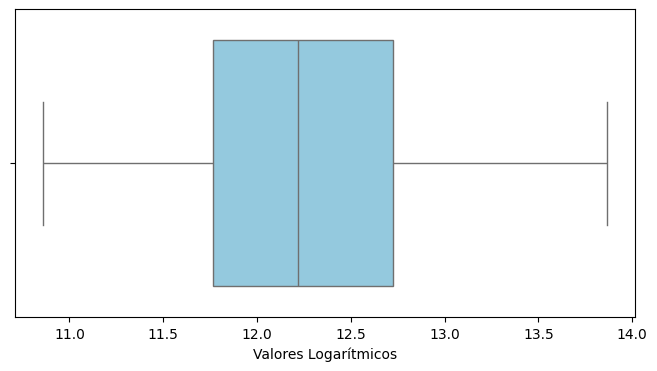

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Caudal = df['Caudal_log']

# Calcular cuartiles e IQR
Q1 = np.percentile(Caudal_log, 25)  # Primer cuartil (Q1)
Q3 = np.percentile(Caudal_log, 75)  # Tercer cuartil (Q3)
IQR = Q3 - Q1  # Rango intercuartílico

# Definir límites para valores atípicos
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Reemplazar outliers con el valor anterior (forward fill)
df['Caudal_log'] = df['Caudal_log'].where(df['Caudal_log'].between(lower_bound, upper_bound)).ffill()

df = df[df['Caudal_log'].between(lower_bound, upper_bound)]

# Graficar boxplot después de la corrección
plt.figure(figsize=(8,4))
sns.boxplot(x=df['Caudal_log'], color='skyblue')
plt.xlabel("Valores Logarítmicos")
plt.show()


In [ ]:
mport pandas as pd
import numpy as np

# Cargar el archivo
df = pd.read_csv('C:/AST_Misisipi/Modelado_Misisipi/Datos_Caudal_Horario_Log.csv', parse_dates=['datetime'])

# Reemplazar los valores de la columna "Caudal" con la inversa del logaritmo de "Caudal_log"
df['Caudal'] = np.exp(df['Caudal_log'])

# Seleccionar solo las columnas datetime y Caudal
df = df[['datetime', 'Caudal']]

# Guardar el nuevo archivo con el nombre indicado
df.to_csv('C:/AST_Misisipi/Modelado_Misisipi/Datos_Caudal_Est.csv', index=False)

# Asignar el nuevo DataFrame a la variable caudal
caudal = df.copy()

# Archivo listo para usar en aplicación de modelos